Alunos:

Almiro  Aleixo

Amanda Dias

Filipe Vilela

# 1º Problema de Negócio

Prever se um cliente irá pagar uma divida com base em dados pessoais e dados relacionados ao relacionamento do cliente com uma insituição financeira, precisamos classificar os clientes em duas categorias


*   1 = Inadimplentes
*   2 = Adimplentes

Cada cliente é representado no conjunto de dados por 15 atributos ou caracteristicas do cliente.

**Atributos** (variáveis de entrada)


Aqui está a lista das colunas enumeradas com uma breve descrição de cada uma:

1. **id**: Identificador único do cliente.
2. **idade**: Idade do cliente.
3. **sexo**: Sexo do cliente (M para masculino, F para feminino).
4. **dependentes**: Número de dependentes do cliente.
5. **escolaridade**: Nível de escolaridade do cliente.
6. **estado_civil**: Estado civil do cliente.
7. **salario_anual**: Faixa de salário anual do cliente.
8. **tipo_cartao**: Tipo de cartão de crédito do cliente.
9. **meses_de_relacionamento**: Número de meses que o cliente tem relacionamento com a instituição financeira.
10. **qtd_produtos**: Quantidade de produtos financeiros adquiridos pelo cliente.
11. **iteracoes_12m**: Número de interações do cliente com a instituição nos últimos 12 meses.
12. **meses_inativo_12m**: Número de meses em que o cliente esteve inativo nos últimos 12 meses.
13. **limite_credito**: Limite de crédito do cliente.
14. **valor_transacoes_12m**: Valor total das transações do cliente nos últimos 12 meses.
15. **qtd_transacoes_12m**: Quantidade total de transações do cliente nos últimos 12 meses.

**Atributo** (variável alvo)

1. **default**: Indicador se o cliente está inadimplente (0 para não inadimplente, 1 para inadimplente).

# 2º Análise Exploratória dos Dados

Importando as biblitoecas e carregando os casos


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [32]:
URL = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv'
df = pd.read_csv(URL, na_values = 'na' )

In [3]:
# Vendo informações das colunas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [4]:
# Top 10 linhas
df.head(10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [6]:
# Verificado se tem valores ausentes/nulos

df.isna().sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

In [5]:
# Verificando dados duplicados
df.duplicated().sum()

0

In [33]:
# prompt: na coluna default mudar os valores se for 0 = Adimplente se for 1 = Inadimplente

df['default'] = df['default'].replace({0: 'Adimplente', 1: 'Inadimplente'})


default
Adimplente      0.84
Inadimplente    0.16
Name: proportion, dtype: float64

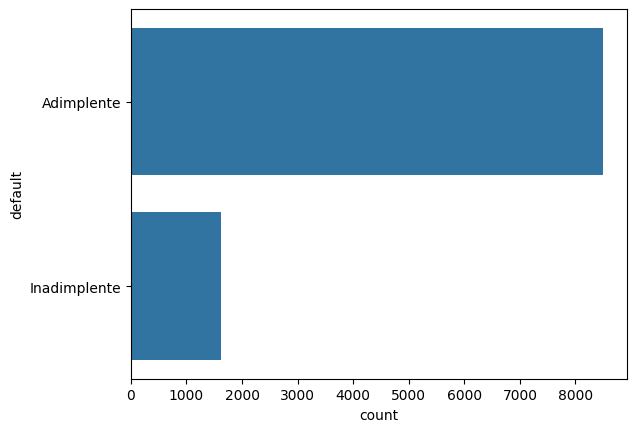

In [34]:
# Analisando a distribuição da variavel alvo, data set está balanceado
df['default'].value_counts()
sns.countplot(df['default'])

round(df.loc[:, 'default'].value_counts(normalize=True),2)


In [13]:
# Análise estatistica de cada tabela
df.describe()

,id,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,7.081000e+03,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000,7081.000000
mean,7.390919e+08,46.347691,2.337805,35.981359,3.819376,2.454456,2.342607,64.503319
std,3.685244e+07,8.041225,1.291649,8.002609,1.544444,1.104917,0.995104,23.809330
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,7.130105e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,44.000000
50%,7.178438e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,7.732370e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,80.000000
max,8.282989e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,134.000000


# 3º Pré-Processamento dos Dados

In [35]:
# remvoer os valores nulos do df

df = df.dropna()
df.isna().sum()


id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64

In [36]:
# prompt: criar um dataset com labelencoder para todas colunas menos a coluna default

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df = df.copy()

for column in df.columns:
  if column != 'default':
    df[column] = le.fit_transform(df[column])

df.head()


,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,5003,Adimplente,19,1,3,1,0,2,0,26,4,3,1,1123,86,32
1,6865,Adimplente,23,0,5,3,2,4,0,31,5,2,1,6135,272,23
2,2131,Adimplente,25,1,3,3,0,3,0,23,3,0,1,4053,1328,10
4,355,Adimplente,14,1,3,4,0,2,0,8,4,0,1,5042,6929,18
5,1790,Adimplente,18,1,2,3,0,1,0,23,2,2,1,4658,39,14


In [37]:
#Converter variáveis categóricas em variáveis numéricas (one-hot encoding), no caso a variável alvo é a única

df_normalizado = df.copy()
df_normalizado['default'] = df_normalizado['default'].replace(['Adimplente', 'Inadimplente'], [0, 1])

In [38]:
# análise de correlação
correlation2 = df_normalizado.corr()

<Axes: >

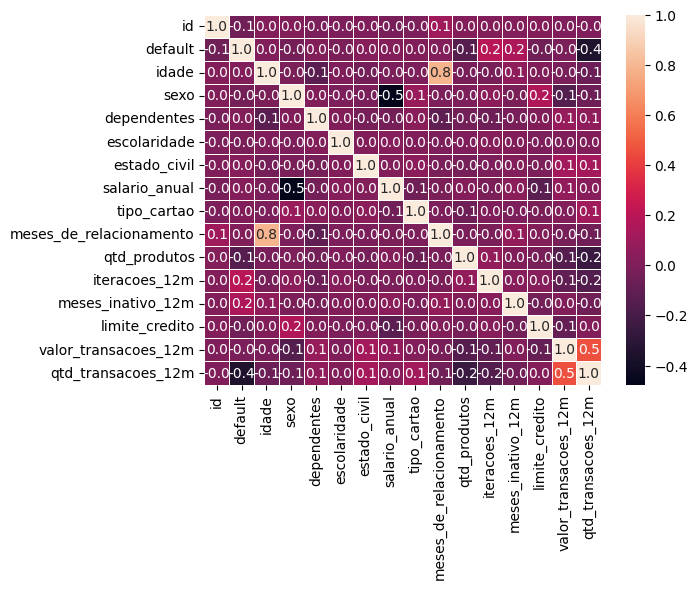

In [39]:
# plot da matriz de correlação
plot2 = sns.heatmap(correlation2, annot = True,  fmt=".1f", linewidths=.6)
plot2

In [40]:
#  ordenar  a variavel correlation para ver as variáveis que serão utilizadas no modelo

sorted_correlation = correlation2.sort_values(by=['default'], ascending=False)
print(sorted_correlation['default'])


default                    1.000000
iteracoes_12m              0.193923
meses_inativo_12m          0.152732
estado_civil               0.024305
salario_anual              0.017429
dependentes                0.011423
meses_de_relacionamento    0.009249
idade                      0.008767
tipo_cartao                0.004156
escolaridade              -0.012305
valor_transacoes_12m      -0.016159
sexo                      -0.035358
limite_credito            -0.047642
id                        -0.051255
qtd_produtos              -0.145713
qtd_transacoes_12m        -0.357265
Name: default, dtype: float64


In [41]:
#Removendo colunas com correlação negativa
df= df.drop(columns=['escolaridade', 'valor_transacoes_12m', 'sexo', 'id', 'limite_credito', 'qtd_produtos', 'qtd_transacoes_12m'])


In [42]:
#Separação das variáveis de entrada(variáveis explicativas) e de Saída (Target)

X = df[['iteracoes_12m' ,'meses_inativo_12m','estado_civil','salario_anual','dependentes','meses_de_relacionamento','idade', 'tipo_cartao']]
y = df['default']

In [43]:
#Separa o data set em 30% teste e 70%treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
# Normalizar os dados de treino e teste antes de criar o modelo (deixar tudo na mesma escala para uma variavel nao ter mais influencia que outra)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4º Modelo Preditivo - KNN

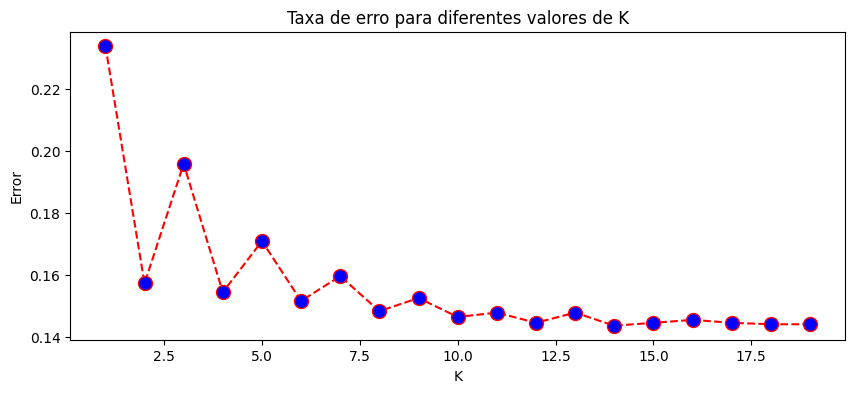

In [45]:
#Grafico Elbow para achar o K

error = []
# Calculating error for K values between 1 and 10
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10, 4))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Taxa de erro para diferentes valores de K')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()


In [46]:
# Criando o modelo e treinando os dados
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [47]:
# Aplicando o modelo aos dados de teste
y_pred = classifier.predict(X_test)

In [48]:
# Comparar  dados de teste e valores preditos
Real_vs_predito = pd.DataFrame({'Real: ': y_test,
                    'Predito: ': y_pred})
Real_vs_predito.head(10)

,Real:,Predito:
6432,Adimplente,Adimplente
7601,Adimplente,Adimplente
326,Adimplente,Adimplente
7495,Adimplente,Adimplente
693,Adimplente,Adimplente
9030,Adimplente,Adimplente
5542,Inadimplente,Adimplente
5494,Adimplente,Adimplente
9268,Inadimplente,Adimplente
3003,Adimplente,Adimplente


# 5º Avaliação Máquina Preditiva ( KNN Métricas)

In [49]:
#Acurácia

print('Accuracy: \n', accuracy_score(y_test, y_pred))

Accuracy: 
 0.8428235294117647


In [50]:
#Classification report
print('Classification metrics: \n', classification_report(y_test, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

  Adimplente       0.86      0.97      0.91      1817
Inadimplente       0.33      0.08      0.13       308

    accuracy                           0.84      2125
   macro avg       0.60      0.53      0.52      2125
weighted avg       0.78      0.84      0.80      2125





**Análise do classification_report:**

O Modelo mostra um desempenho geralmente bom, com uma precisão média (macro avg) de 88% e uma precisão ponderada (weighted avg) de 88%.

**Precisão (precision):** A precisão mede a proporção de verdadeiros positivos em relação ao total de exemplos classificados como positivos. O modelo tem uma precisão de 89% para a classe "Pago" e 88% para a classe "Quebrado". Isso significa que, das previsões feitas para cada classe, a maioria está correta.

**Recall (recall):** O recall ou sensibilidade, mede a proporção de verdadeiros positivos que foram corretamente identificados pelo modelo. O modelo tem um recall de 92% para a classe "Pago" e 82% para a classe "Quebrado". Isso indica que o modelo é mais eficaz em identificar casos verdadeiramente positivos da classe "Pago".

**F1-score (F1-score):** O F1-score é a média harmônica entre precisão e recall e fornece uma medida única que equilibra essas duas métricas. O modelo tem um F1-score de 90% para a classe "Pago" e 85% para a classe "Quebrado". Um valor alto de F1-score indica um bom equilíbrio entre precisão e recall.

**Acurácia (accuracy):** A acurácia mede a proporção de previsões corretas feitas pelo modelo para todas as classes. O modelo tem uma acurácia de 88%, o que indica que, no geral, ele está fazendo previsões corretas para a maioria dos exemplos.

**Conclusão:**

O modelo KNN está apresentando um desempenho sólido, com boa precisão, recall e F1-score para ambas as classes.

In [51]:
#Matriz de confusão

print('Confusion_matrix: \n', confusion_matrix(y_test, y_pred))

Confusion_matrix: 
 [[1766   51]
 [ 283   25]]


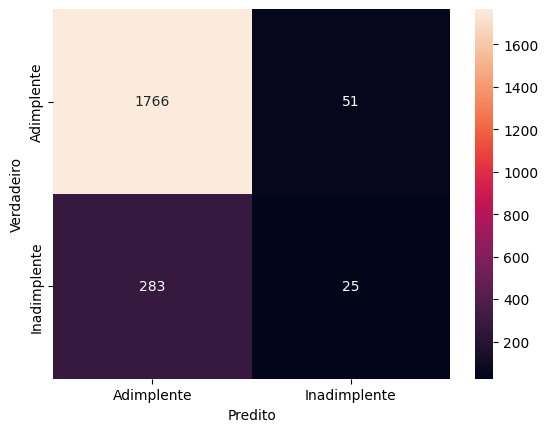

In [52]:
#Matriz de confusão

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", xticklabels=df['default'].unique(), yticklabels=df['default'].unique())
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()



**A matriz de confusão mostra o seguinte:**

* **Verdadeiros Positivos (TP):** 7460 - São os casos em que o modelo previu corretamente "Pago" e o valor real também era "Pago".
* **Falsos Negativos (FN):** 964 - São os casos em que o modelo previu incorretamente "Quebrado" quando o valor real era "Pago".
* **Falsos Positivos (FP):** 618 - São os casos em que o modelo previu incorretamente "Pago" quando o valor real era "Quebrado".
* **Verdadeiros Negativos (TN):** 4363 - São os casos em que o modelo previu corretamente "Quebrado" e o valor real também foi "Quebrado".

**Análise:**

* O modelo possui um elevado número de Verdadeiros Positivos (TP), indicando que é bom na identificação correta de casos de “Pago”.
* O modelo apresenta um número relativamente baixo de Falsos Negativos (FN), indicando que não costuma classificar erroneamente os casos de “Pago” como “Quebrado”.
* O modelo apresenta um número um pouco maior de Falsos Positivos (FP) em comparação com Falsos Negativos, indicando que às vezes classifica erroneamente os casos de “Quebrado” como “Pago”.
* No geral, o modelo apresenta um bom desempenho, com alta precisão e classificação equilibrada para ambas as classes.


In [53]:
# Resumo e validação do modelo


# Calcular o número de previsões corretas
previsoes_corretas = (y_pred == y_test).sum()
previsoes_incorretas = len(y_test) - previsoes_corretas
percentual_corretas = (previsoes_corretas / len(y_test)) * 100
percentual_incorretas = (previsoes_incorretas / len(y_test)) * 100


print(f"Número de previsões corretas: {previsoes_corretas}")
print(f"Número de previsões incorretas: {previsoes_incorretas} \n")


print(f"% corretas: {percentual_corretas}")
print(f"% incorretas: {percentual_incorretas}")


Número de previsões corretas: 1791
Número de previsões incorretas: 334 

% corretas: 84.28235294117647
% incorretas: 15.71764705882353


# 6º Modelo Pretitivo - RNA

**Criando o modelo de Rede Neural e Treinando**




In [60]:


from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Rede Neural
nn_model = MLPClassifier(hidden_layer_sizes=(21,), activation='logistic', solver='adam', max_iter=1000, learning_rate_init=0.01)

# Treinando o Modelo
nn_model.fit(X_train, y_train)

# Fazendo Previsões
y_pred_rna = nn_model.predict(X_test)

#Parâmetros da rede neural

#hidden_layer_sizes = números de neurônios camadas ocultas
#activation = função de ativação das camadas das redes neurais
#solver = algoritmo de otimização
#max_iter = define o número máximo de iterações (épocas) que o algoritmo de treinamento utilizará durante o processo de treinamento da rede neural.
#learning_rate = define a taxa de aprendizado inicial para o algoritmo de otimização durante o treinamento da rede neural.

In [55]:
# Comparando dados de teste e valores preditos
Real_vs_predito_rna = pd.DataFrame({'Real: ': y_test,
                    'Predito: ': y_pred_rna})
Real_vs_predito_rna.head(10)

,Real:,Predito:
6432,Adimplente,Adimplente
7601,Adimplente,Adimplente
326,Adimplente,Adimplente
7495,Adimplente,Adimplente
693,Adimplente,Adimplente
9030,Adimplente,Adimplente
5542,Inadimplente,Adimplente
5494,Adimplente,Adimplente
9268,Inadimplente,Adimplente
3003,Adimplente,Adimplente


# 7º Avaliação Máquina Preditiva (RNA Métricas)

In [61]:
#Avaliação do modelo pelas médias das estatisticas
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
ac_sc = accuracy_score(y_test, y_pred_rna)
rc_sc = recall_score(y_test, y_pred_rna, average="weighted")
pr_sc = precision_score(y_test,y_pred_rna, average="weighted")
f1_sc = f1_score(y_test, y_pred_rna, average="weighted")
consufion_m = confusion_matrix(y_test, y_pred_rna)

print("===== RNA====")
print("Accuracy   :", ac_sc)
print("Recall     :", rc_sc)
print("Precision  :", pr_sc)
print("F1 Score   :", f1_sc)
print("Confusion Matrix   : \n")
print(consufion_m)

===== RNA====
Accuracy   : 0.8470588235294118
Recall     : 0.8470588235294118
Precision  : 0.8018324416327868
F1 Score   : 0.8114150265413682
Confusion Matrix   : 

[[1760   57]
 [ 268   40]]


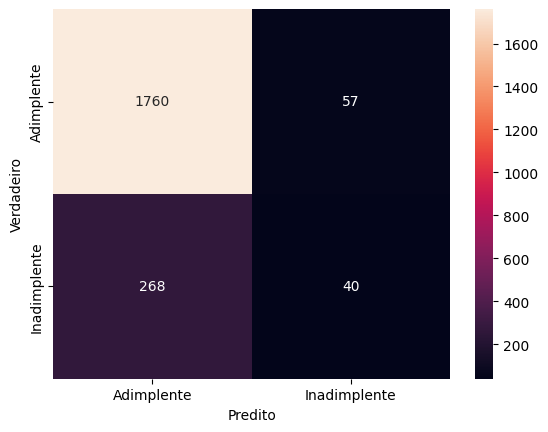

In [62]:
#Matriz de confusão

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rna)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", xticklabels=df['default'].unique(), yticklabels=df['default'].unique())
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()


**A matriz de confusão mostra o seguinte:**

* **Verdadeiros Positivos (TP):** 7660 - São os casos em que o modelo previu corretamente "Pago" e o valor real também era "Pago".
* **Falsos Negativos (FN):** 1076 - São os casos em que o modelo previu incorretamente "Quebrado" quando o valor real era "Pago".
* **Falsos Positivos (FP):** 418 - São os casos em que o modelo previu incorretamente "Pago" quando o valor real era "Quebrado".
* **Verdadeiros Negativos (TN):** 4251 - São os casos em que o modelo previu corretamente "Quebrado" e o valor real também foi "Quebrado".

In [63]:
#Classificação report da RNA

print(classification_report(y_test, y_pred_rna))


              precision    recall  f1-score   support

  Adimplente       0.87      0.97      0.92      1817
Inadimplente       0.41      0.13      0.20       308

    accuracy                           0.85      2125
   macro avg       0.64      0.55      0.56      2125
weighted avg       0.80      0.85      0.81      2125



**Precisão (Precision):**
A precisão mede a proporção de instâncias positivas classificadas corretamente em relação ao total de instâncias classificadas como positivas.
Para a classe "Pago", a precisão é de 0.88, o que significa que 88% das instâncias classificadas como "Pago" estão corretas.
Para a classe "Quebrado", a precisão é de 0.91, indicando que 91% das instâncias classificadas como "Quebrado" estão corretas.

**(Recall):**
A revocação mede a proporção de instâncias positivas que foram corretamente identificadas pelo modelo em relação ao total de instâncias que são realmente positivas.
Para a classe "Pago", a revocação é de 0.95, o que significa que o modelo identificou corretamente 95% das instâncias de "Pago".
Para a classe "Quebrado", a revocação é de 0.80, indicando que o modelo identificou corretamente 80% das instâncias de "Quebrado".

**F1-Score:**
O F1-Score é a média harmônica entre precisão e revocação e fornece uma medida única que combina essas duas métricas.
Para a classe "Pago", o F1-Score é de 0.91.
Para a classe "Quebrado", o F1-Score é de 0.85.


**Acurácia (Accuracy):**
A acurácia é a proporção de instâncias corretamente classificadas em relação ao total de instâncias.
A acurácia geral do modelo é de 0.89 ou 89%, o que é uma boa medida geral de desempenho, especialmente se as classes forem balanceadas.

**Conclusão:**


Podemos concluir que o modelo de rede neural parece ser eficaz na classificação das classes de "Pago". Ele demonstra um desempenho sólido, com altas pontuações de precisão, revocação e F1-score, especialmente para a classe "Pago". A acurácia geral do modelo é de 89%, o que indica uma boa capacidade de generalização.

# 8º Comparação KNN x RNA

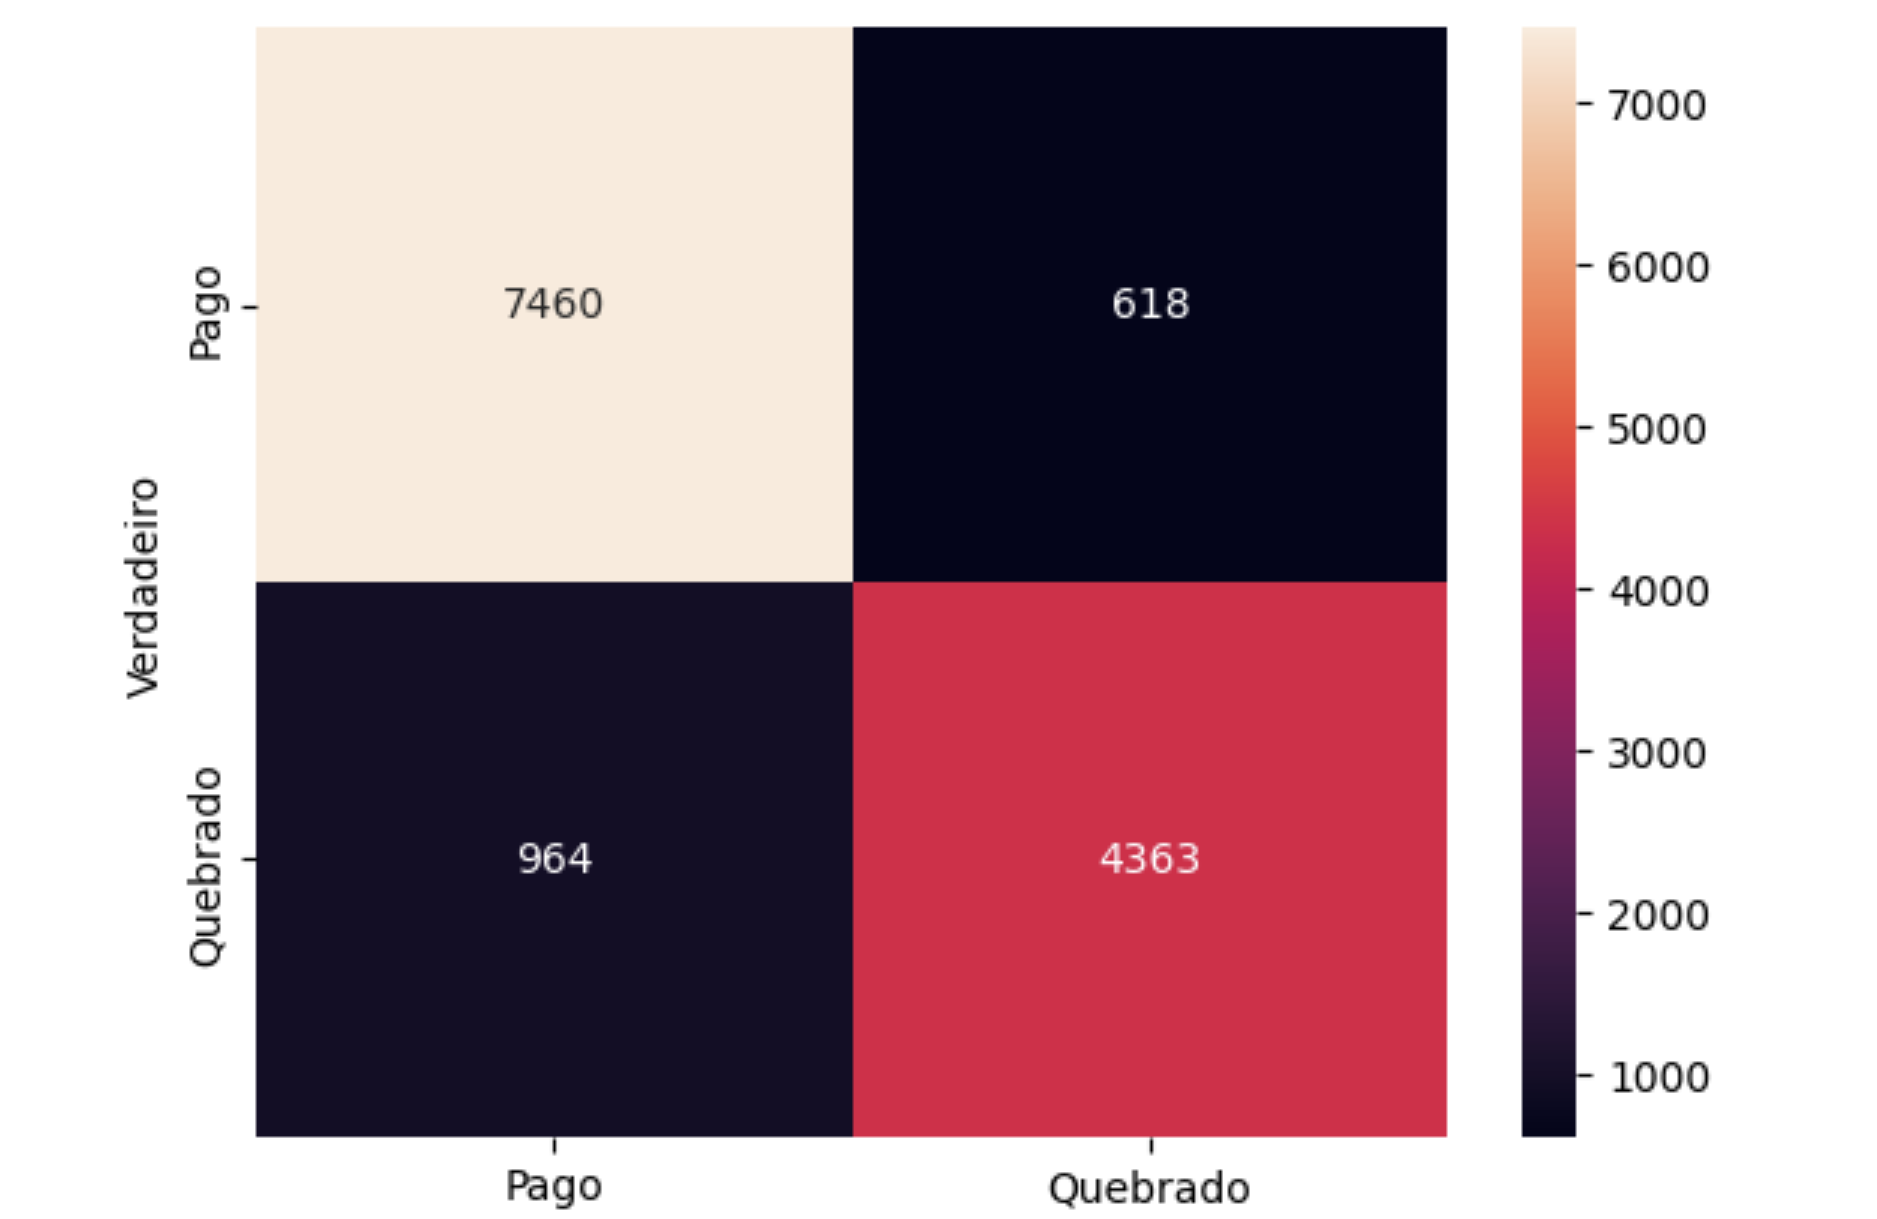

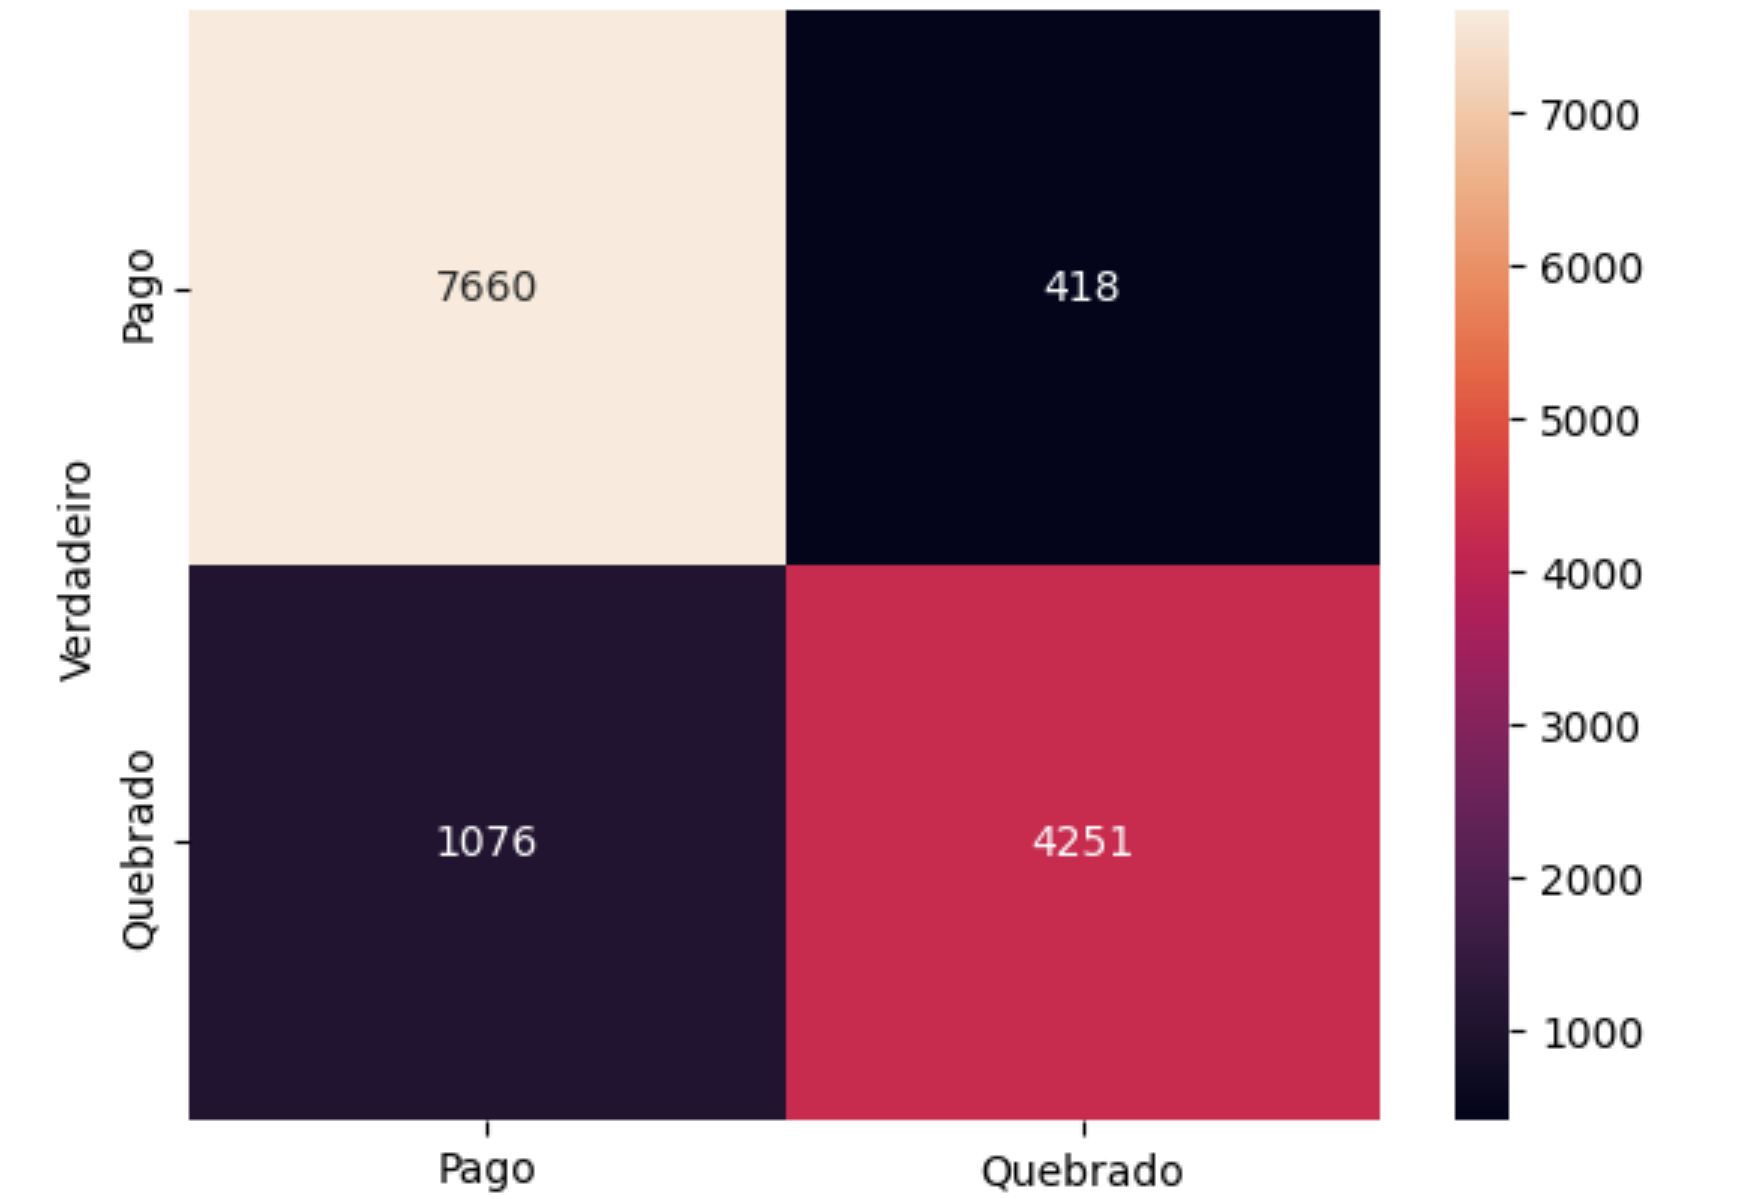

# 9º Conclusão

O modelo de rede neural foi o mais eficiente para prever casos como "Pago"
O modelo do KNN foi mais eficiente para prever casos como "Quebrado"



Considerando as métricas de precisão, recall e f1-score, podemos ver que o modelo de Rede Neural (RNA) obteve um desempenho geral melhor do que o modelo KNN para ambas as classes. O modelo RNA teve um recall mais alto para a classe "Pago".

Portanto, para o nosso problema de negócio a escolha de um modelo de Rede Neural torna-se ideal para prever clientes que irão Pagar seus acordos.
